# Built in OpenCV functions for noise and for RGB to grayscale conversion
includes
## Add noise to image
1. Uniform noise
2. Gaussian Nosie
3. Salt and pepper noise

In [1]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

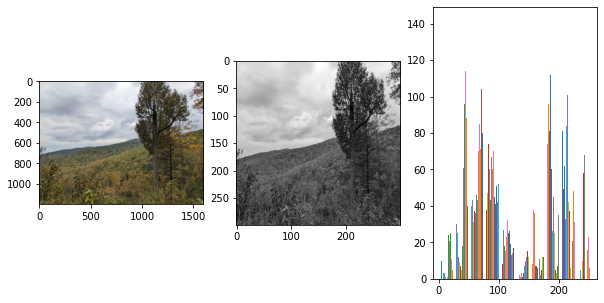

In [12]:
# The function cv2.imread() is used to read an image.
og_image = cv2.imread('test images//wp 2.jpg',-1)
b,g,r = cv2.split(og_image) #for some reason openCV reads images in bgr order, cuz they believe that standardization is not important
final_image= cv2.merge((r,g,b))
grayscale_img= 0.33333*b + 0.333333*r + 0.333333*g
small_img = cv2.resize(grayscale_img,(300,300),interpolation=cv2.INTER_LINEAR)
# The function plt.imshow() is used to display an image in a window.
# display images
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,5)
ax[0].imshow(final_image, cmap='gray')
ax[1].imshow(small_img, cmap="gray")
ax[2].hist(small_img)
# plt.show()
# plt.imshow(img_grayscale)
# plt.imshow(final_image)
# waitKey() waits for a key press to close the window and 0 specifies indefinite loop
cv2.waitKey(0)
# cv2.destroyAllWindows() simply destroys all the windows we created.
cv2.destroyAllWindows()
# The function cv2.imwrite() is used to write an image.
# cv2.imwrite('grayscale.jpg',img_grayscale)

In [ ]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [ ]:
def gaussian_noise(image):
    row,col,ch= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy

In [ ]:
def unifrom_noise(image):
    x, y = image.shape
    mean = 0
    max = 0.2
    noise = np.zeros((x,y), dtype=np.float64)
    for i in range(x):
        for j in range(y):
            noise[i][j] = np.random.uniform(mean,max)
    noise_img = image + noise
    noise_img = np.clip(noise_img, 0, 1)
    return noise_img

